In [79]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate

In [80]:
with open("colimator-scans-data.pkl", "rb") as f:
    data = pickle.load(f)

In [81]:
with open("colimator-scans-details.pkl", "rb") as f:
    details = pickle.load(f)

In [82]:
details[6052].keys()

dict_keys(['beam1', 'beam2'])

In [83]:
details[6052]['beam1']["vertical"]

{'startTime': '2017-08-06 22:40:00',
 'endTime': '2017-08-07 00:50:00',
 'stepsRange': [4, 51],
 'measuredEmittance': 4.0,
 'nominalBeamSizeUM': 200,
 'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_D6_L7_B1.csv',
 'movingJaw': 'TCP.D6L7.B1:MEAS_LVDT_LU',
 'nonMovingJaw': 'TCP.D6L7.B1:MEAS_LVDT_RU'}

In [84]:
details[6052]['beam1']["horizontal"]

{'startTime': '2017-08-06 22:40:00',
 'endTime': '2017-08-07 00:50:00',
 'stepsRange': [4, 40],
 'measuredEmittance': 3.5,
 'nominalBeamSizeUM': 280,
 'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_C6_L7_B1.csv',
 'movingJaw': 'TCP.C6L7.B1:MEAS_LVDT_LU',
 'nonMovingJaw': 'TCP.C6L7.B1:MEAS_LVDT_RU'}

## Scenario 3.2 values

In [85]:
w1 = 1.0
w2 = 0.1
w3 = 0.1

In [86]:
m_6052 = -97e-15
q_6052 = 6.2e-13
r2_6052 = 3.5e-26

m_6194 = -59e-15
q_6194 = 4.1e-13
r2_6194 = 0.8e-26

m_7221 = -3.4e-15
q_7221 = 2.8e-13
r2_7221 = 0.2e-26

m_7392 = -10e-15
q_7392 = 5.3e-13
r2_7392 = 0.4e-26

$$ \Delta I = F \Lambda $$
$$ F = m \sigma_N + q $$

In [87]:
data[6052]["TCP_IR7_B1V"]["lowres"].keys()

dict_keys(['timestamps', 'TCP.D6L7.B1:MEAS_LVDT_LU', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'TCP.D6R7.B2:MEAS_LVDT_LU'])

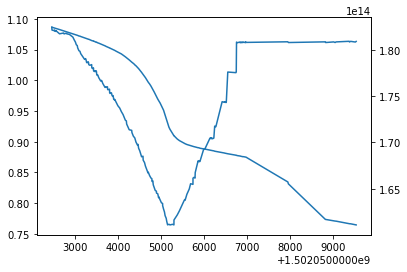

In [88]:
x = data[6052]["TCP_IR7_B1V"]["lowres"]['timestamps']
plt.plot(x, data[6052]["TCP_IR7_B1V"]["lowres"]['TCP.D6L7.B1:MEAS_LVDT_LU'])
plt.twinx()
plt.plot(x, data[6052]["TCP_IR7_B1V"]["lowres"]['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'])

In [89]:
print(details[6052]["beam1"]["vertical"])
measured_emittance = details[6052]["beam1"]["vertical"]["measuredEmittance"]
nominal_beam_size = details[6052]["beam1"]["vertical"]["nominalBeamSizeUM"]
nominal_emittance = 3.5

{'startTime': '2017-08-06 22:40:00', 'endTime': '2017-08-07 00:50:00', 'stepsRange': [4, 51], 'measuredEmittance': 4.0, 'nominalBeamSizeUM': 200, 'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_D6_L7_B1.csv', 'movingJaw': 'TCP.D6L7.B1:MEAS_LVDT_LU', 'nonMovingJaw': 'TCP.D6L7.B1:MEAS_LVDT_RU'}


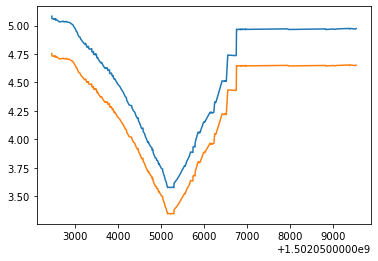

In [ ]:
vals = data[6052]["TCP_IR7_B1V"]["lowres"]['TCP.D6L7.B1:MEAS_LVDT_LU']
#plt.plot(x, vals, c="red")

plt.plot(x, vals / (nominal_beam_size / 1000) * np.sqrt(nominal_emittance / measured_emittance))
new_vals = vals / (nominal_beam_size / 1000) * (nominal_emittance / measured_emittance)
plt.plot(x, new_vals)

In [ ]:
np.sqrt(nominal_emittance / measured_emittance)

0.9354143466934853

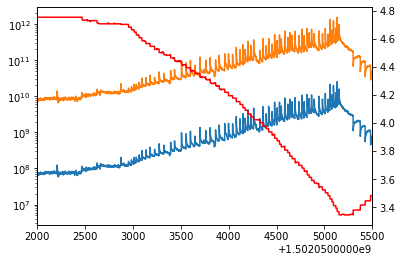

In [ ]:
interp = scipy.interpolate.interp1d(x, new_vals, kind='previous', fill_value="extrapolate", bounds_error=False)

def conversion_func(x, y):
    F = m_6052 * interp(x) + q_6052
    return y / F

plt.xlim(52000 +1.5020e9, 55500+1.5020e9)

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1] / 1.8e-11)
plt.plot(d[0], conversion_func(d[0], d[1]))
plt.yscale("log")

plt.twinx()
plt.plot(d[0], interp(d[0]), c="red")

In [ ]:
plt.plot()

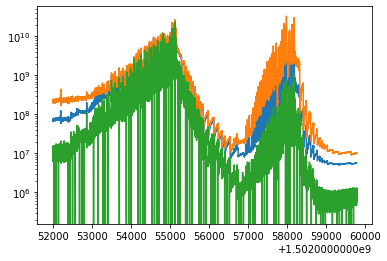

In [ ]:
d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1] / 1.8e-11)

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMEI.06L7.B1E10_TCP.A6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1] / 1.8e-11)

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST"]
plt.plot(d[0], d[1] / 1.8e-11)

plt.yscale("log")

779700
6965
7376


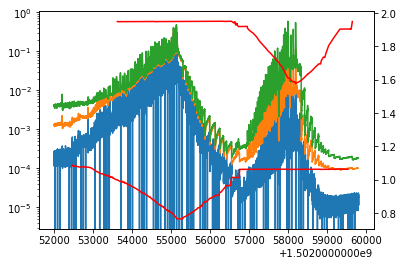

In [ ]:
d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST"]
plt.plot(d[0], d[1])
print(len(d[0]))
d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1])
print(len(d[0]))
d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMEI.06L7.B1E10_TCP.A6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1])
print(len(d[0]))
plt.yscale("log")

# plt.twinx()
# d = data[6052]["TCP_IR7_B1V"]["hires"]["LHC.BCTDC.A6R4.B1:BEAM_INTENSITY"]
# plt.plot(d[0], d[1], c="red")
plt.twinx()
x = data[6052]["TCP_IR7_B1V"]["lowres"]['timestamps']
plt.plot(x, data[6052]["TCP_IR7_B1V"]["lowres"]['TCP.D6L7.B1:MEAS_LVDT_LU'], c="red")
x = data[6052]["TCP_IR7_B1H"]["lowres"]['timestamps']
plt.plot(x, data[6052]["TCP_IR7_B1H"]["lowres"]['TCP.C6L7.B1:MEAS_LVDT_LU'], c="red")

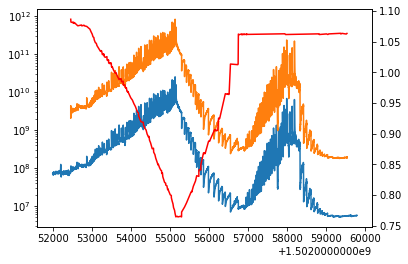

In [ ]:
# di = data[6052]["TCP_IR7_B1V"]["hires"]["LHC.BCTDC.A6R4.B1:BEAM_INTENSITY"]
# plt.plot(di[0], di[1], c="red")

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1] / 1.8e-11)

x = data[6052]["TCP_IR7_B1V"]["lowres"]['timestamps']
y = data[6052]["TCP_IR7_B1V"]["lowres"]['TCP.D6L7.B1:MEAS_LVDT_LU']

collimator = scipy.interpolate.interp1d(x, y, kind="linear")

def my_F(val):
    val[val < x[0]] = x[0]
    val[val > x[-1]] = x[-1]
    return collimator(val) * m_6052 * 1  + q_6052

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1] / my_F(d[0]))

plt.yscale("log")

plt.twinx()

plt.plot(x, y, c="red")




In [ ]:
my_F(d[0])

array([5.146095e-13, 5.146095e-13, 5.146095e-13, ..., 5.168502e-13,
       5.168502e-13, 5.168502e-13])

In [ ]:
d[1] / my_F(d[0])

array([2.54412035e+09, 2.63565772e+09, 2.53161572e+09, ...,
       1.96697999e+08, 1.99460501e+08, 1.97045295e+08])

In [ ]:
steps = data[6052]["TCP_IR7_B1V"]["steps"]

In [ ]:
# s = steps["TCP.D6L7.B1:MEAS_LVDT_LD"]
s = steps["TCP.D6L7.B1:MEAS_LVDT_LU"]
# s = steps["TCP.D6L7.B1:MEAS_LVDT_RD"]
# s = steps["TCP.D6L7.B1:MEAS_LVDT_RU"]
t_beg = [x[0] for x in s]
t_end = [x[1] for x in s]
step_lenght = [x[2] for x in s]
total_step = [x[3] for x in s]
pos_beg =  [x[4] for x in s]
pos_end =  [x[5] for x in s]

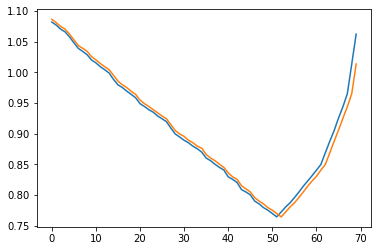

In [ ]:
plt.plot(pos_beg)
plt.plot(pos_end)

In [ ]:
for i in range(len(pos_beg)):
    # print floats at full precision
    print("pos_beg:","{:.10f}".format(pos_beg[i]),"pos_end", "{:.10f}".format(pos_end[i]))

pos_beg: 1.0819000000 pos_end 1.0865000000
pos_beg: 1.0770000000 pos_end 1.0810000000
pos_beg: 1.0704000000 pos_end 1.0748000000
pos_beg: 1.0660000000 pos_end 1.0704000000
pos_beg: 1.0579000000 pos_end 1.0623000000
pos_beg: 1.0483000000 pos_end 1.0530000000
pos_beg: 1.0391000000 pos_end 1.0436000000
pos_beg: 1.0341000000 pos_end 1.0391000000
pos_beg: 1.0288000000 pos_end 1.0344000000
pos_beg: 1.0201000000 pos_end 1.0256000000
pos_beg: 1.0154000000 pos_end 1.0203000000
pos_beg: 1.0092000000 pos_end 1.0144000000
pos_beg: 1.0042000000 pos_end 1.0091000000
pos_beg: 0.9988000000 pos_end 1.0042000000
pos_beg: 0.9884000000 pos_end 0.9951000000
pos_beg: 0.9796000000 pos_end 0.9856000000
pos_beg: 0.9752000000 pos_end 0.9797000000
pos_beg: 0.9693000000 pos_end 0.9751000000
pos_beg: 0.9641000000 pos_end 0.9690000000
pos_beg: 0.9586000000 pos_end 0.9641000000
pos_beg: 0.9490000000 pos_end 0.9548000000
pos_beg: 0.9443000000 pos_end 0.9490000000
pos_beg: 0.9391000000 pos_end 0.9443000000
pos_beg: 0.

In [ ]:
for i in range(len(pos_beg)):
    # print floats at full precision
    print("pos_beg:","{:.2f}".format(t_beg[i]),"pos_end", "{:.2f}".format(t_end[i]))

pos_beg: 1502052461.72 pos_end 1502052466.72
pos_beg: 1502052555.72 pos_end 1502052622.72
pos_beg: 1502052871.73 pos_end 1502052951.73
pos_beg: 1502052951.73 pos_end 1502052981.73
pos_beg: 1502053010.74 pos_end 1502053031.74
pos_beg: 1502053062.74 pos_end 1502053091.74
pos_beg: 1502053132.74 pos_end 1502053176.74
pos_beg: 1502053176.74 pos_end 1502053223.74
pos_beg: 1502053253.74 pos_end 1502053271.74
pos_beg: 1502053387.75 pos_end 1502053391.75
pos_beg: 1502053428.75 pos_end 1502053432.75
pos_beg: 1502053498.75 pos_end 1502053505.75
pos_beg: 1502053525.75 pos_end 1502053553.75
pos_beg: 1502053553.75 pos_end 1502053598.75
pos_beg: 1502053644.75 pos_end 1502053698.75
pos_beg: 1502053802.76 pos_end 1502053805.76
pos_beg: 1502053846.76 pos_end 1502053861.76
pos_beg: 1502053885.76 pos_end 1502053899.76
pos_beg: 1502053922.76 pos_end 1502053957.76
pos_beg: 1502053957.76 pos_end 1502053996.76
pos_beg: 1502054039.76 pos_end 1502054077.77
pos_beg: 1502054077.77 pos_end 1502054116.77
pos_beg: 1

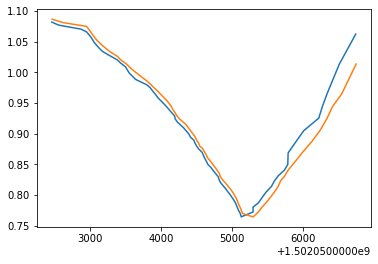

In [ ]:
plt.plot(t_beg, pos_beg)
plt.plot(t_end, pos_end)

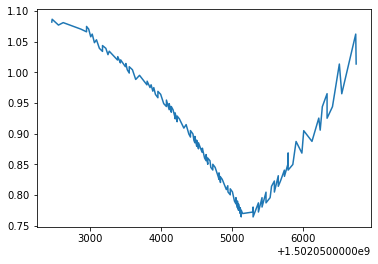

In [ ]:
t = list((t_beg + t_end))
pos = list((pos_beg + pos_end))

x, y = zip(*sorted(zip(t, pos), key=lambda x: x[0]))

plt.plot(x, y)

In [ ]:
steps["TCP.D6L7.B1:MEAS_LVDT_LU"]

([1502052461.718, 1502052466.718, 5.0, 4, 1.0819, 1.0865],
 [1502052555.721, 1502052622.7220001, 67.00100016593933, 4, 1.077, 1.081],
 [1502052871.727, 1502052951.73, 80.00300002098083, 4, 1.0704, 1.0748],
 [1502052951.73, 1502052981.732, 30.002000093460083, 4, 1.066, 1.0704],
 [1502053010.7350001, 1502053031.7350001, 21.0, 4, 1.0579, 1.0623],
 [1502053062.737, 1502053091.738, 29.000999927520752, 4, 1.0483, 1.053],
 [1502053132.738, 1502053176.739, 44.00100016593933, 4, 1.0391, 1.0436],
 [1502053176.739, 1502053223.741, 47.001999855041504, 4, 1.0341, 1.0391],
 [1502053253.742, 1502053271.742, 18.0, 5, 1.0288, 1.0344],
 [1502053387.746, 1502053391.746, 4.0, 5, 1.0201, 1.0256],
 [1502053428.746, 1502053432.746, 4.0, 4, 1.0154, 1.0203],
 [1502053498.749, 1502053505.749, 7.0, 5, 1.0092, 1.0144],
 [1502053525.749, 1502053553.75, 28.000999927520752, 4, 1.0042, 1.0091],
 [1502053553.75, 1502053598.75, 45.0, 5, 0.9988, 1.0042],
 [1502053644.751, 1502053698.751, 54.0, 6, 0.9884, 0.9951],
 [1502